In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv('scraped_data_10.csv')

In [3]:
df.describe()

# I already see that price is not included because there are some strings in the column.

,Bedrooms,Terrace surface,Surface of the plot,Living room surface,Number of frontages,Construction year,Outdoor parking space,Bathrooms,Shower rooms,Toilets,immo_code,postal code
count,10138.000000,10138.000000,1.013800e+04,10138.000000,10138.000000,10138.000000,10138.0,10138.000000,10138.000000,10138.000000,1.013800e+04,10138.000000
mean,2.739100,8.106924,7.880428e+02,14.508384,1.849872,1122.162754,0.0,1.122213,0.308739,1.205070,9.588205e+06,4829.721641
std,1.896267,21.906764,1.182445e+04,30.838190,1.538096,979.419282,0.0,1.071369,1.824922,1.306326,3.181988e+06,3981.973255
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,-1.000000,0.000000,0.000000e+00,2.000000
25%,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.064568e+07,1480.000000
50%,3.000000,0.000000,6.500000e+01,0.000000,2.000000,1930.000000,0.0,1.000000,0.000000,1.000000,1.065318e+07,3920.000000
75%,3.000000,9.000000,4.907500e+02,30.000000,3.000000,1985.000000,0.0,1.000000,0.000000,2.000000,1.065985e+07,8430.000000
max,60.000000,663.000000,1.090481e+06,2340.000000,26.000000,2025.000000,0.0,27.000000,116.000000,20.000000,1.066718e+07,100000.000000


In [4]:
#remove the € figure as there were some empty ones
df =df.replace({'\€':'','\)':'','\.':''},regex=True) 

In [5]:
#Remove the rows that have a 0 as price

#df = df[df.iloc[:, 0] != 0]
df = df[df.iloc[:, 0].astype(str).str.strip() != '0']

''' The astype(str) is used to convert the values in the first column to strings
    the str.strip() is to remove trailing spaces
    the !=0 is to filter out the strings that are not 0
    '''

' The astype(str) is used to convert the values in the first column to strings\n    the str.strip() is to remove trailing spaces\n    the !=0 is to filter out the strings that are not 0\n    '

In [6]:
# Remove the rows that have a missing value as price

#df = df.dropna(subset=['Price'])
df = df[df['Price'].notnull() & (df['Price'] != '')]

In [7]:
df.head(5)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code
1,469000,Heidestatiestraat 26,3,D,390,No,Yes,0,760,34,...,0,0,1,0,0,2,Installed,0,10666428,2910
2,1395000,"Rue de Wavre, 27",5,C,178,0,0,60,6468,50,...,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil,10666426,1301
3,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666424,6700
4,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666423,6700
5,425000,"Grote steenweg, 511",2,C,254,0,0,4,0,40,...,As new,0,1,0,0,0,Installed,0,10666422,2000


In [8]:
replace_dataframe={'Yes':1,'No':0}
columns_to_convert=['Furnished','Terrace','Office']

df[columns_to_convert]=df[columns_to_convert].replace(replace_dataframe)

In [9]:
df = df[df['Price'].astype(str).str.len() >= 6]

# I removed the prices that had small values to get all houses for sale, rather than rent.

In [10]:
df.head()

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code
1,469000,Heidestatiestraat 26,3,D,390,0,1,0,760,34,...,0,0,1,0,0,2,Installed,0,10666428,2910
2,1395000,"Rue de Wavre, 27",5,C,178,0,0,60,6468,50,...,Good,0,2,3,1,4,Hyper equipped,Fuel oil,10666426,1301
3,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666424,6700
4,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666423,6700
5,425000,"Grote steenweg, 511",2,C,254,0,0,4,0,40,...,As new,0,1,0,0,0,Installed,0,10666422,2000


In [11]:
# exclude the prices that contain / or ! attached to the price
df = df[~df['Price'].str.contains('[/!]', na=False)]

#!!!! ~must be in front to remove these rows, if you do not include the ~, then it will only keep the rows with / and ! in Price

In [12]:
# Remove all strings from the column

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#converts the values from 'Price' to numeric type and those that are not numeric value converts to NaN. 
#Further dropped by dropna
df = df.dropna(subset=['Price'])

In [13]:
df = df[~df['Energy class'].astype(str).str.contains('Not specified')]

In [14]:
df = df[df.iloc[:, -4].astype(str).str.strip() != '0']

In [15]:
df = df[df.iloc[:, -11].astype(str).str.strip() != '0'] # removed in column construction year the 0

In [16]:
df.to_csv('adjusted_price.csv',index=False)

In [17]:
df =df.drop('Outdoor parking space', axis=1) # removed the Outdoor parking space as the only result was 0

In [18]:
df.to_csv('adjusted_price.csv',index=False)

In [19]:
df.dtypes

Price                         float64
Address                        object
Bedrooms                        int64
Energy class                   object
Primary energy consumption     object
Furnished                      object
Terrace                        object
Terrace surface                 int64
Surface of the plot             int64
Living room surface             int64
Number of frontages             int64
Construction year               int64
Building condition             object
Bathrooms                       int64
Shower rooms                    int64
Office                         object
Toilets                         int64
Kitchen type                   object
Heating type                   object
immo_code                       int64
postal code                     int64
dtype: object

**Provide the correlation between the columns**

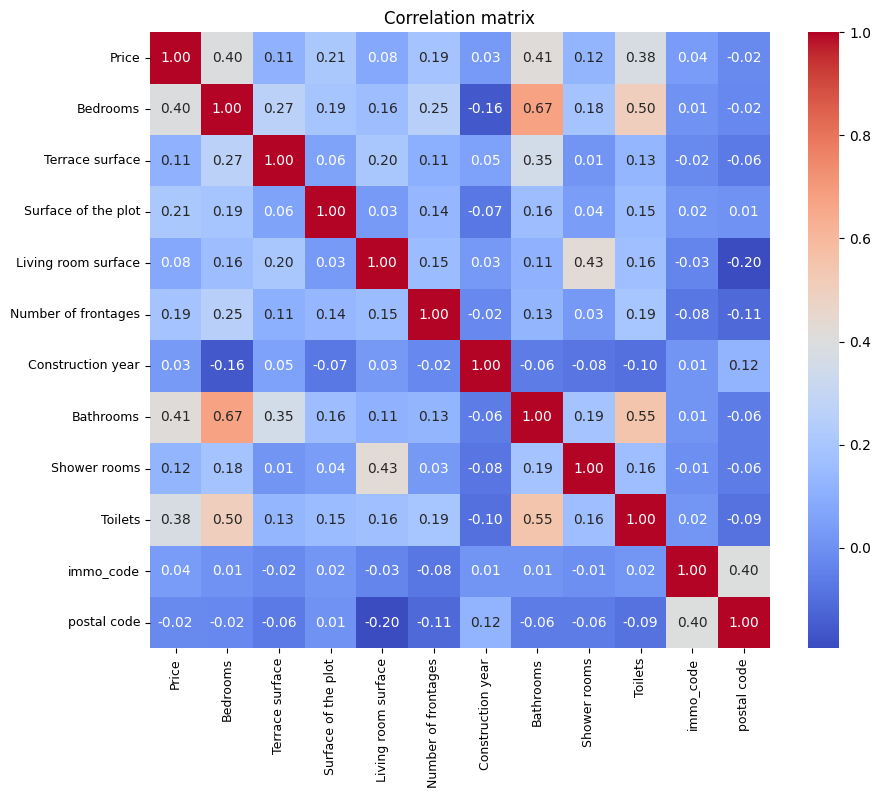

In [20]:


correlation_matrix=df.corr(numeric_only=True)

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.title('Correlation matrix')

plt.show()

**Provide a scatterplot between the construction year of property and the price**

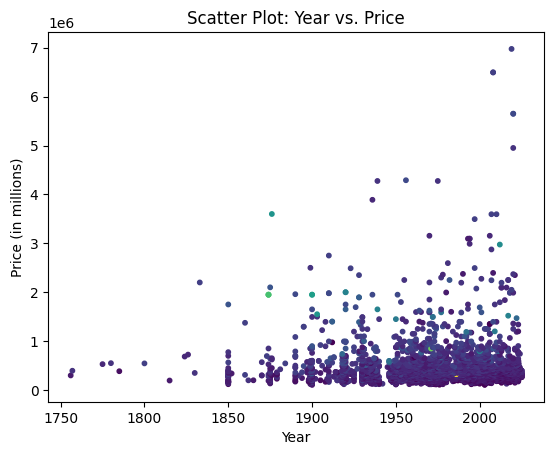

In [34]:
years = df['Construction year']
prices = df['Price']
colors= df['Bedrooms']
plt.scatter(years, prices,c=colors,cmap='viridis',s=10)

plt.xlabel('Year')
plt.ylabel('Price (in millions)')
plt.title('Scatter Plot: Year vs. Price')

plt.show()


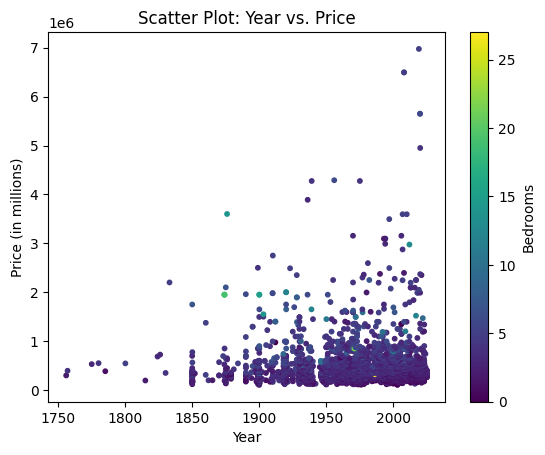

In [45]:


years = df['Construction year']
prices = df['Price']
categories = df['Bedrooms']

# Add jitter to the x-axis within each category
jitter = np.random.uniform(low=-0.1, high=0.1, size=len(years))
jittered_years = years + jitter

plt.scatter(jittered_years, prices, c=categories, cmap='viridis',s=10)

plt.xlabel('Year')
plt.ylabel('Price (in millions)')
plt.title('Scatter Plot: Year vs. Price')

plt.colorbar(label='Bedrooms')

plt.show()


**<h2>The Outliers</h2>**
**The five most expensive houses are in Knokke**

In [22]:
df = df.sort_values(by='Price', ascending=True)
df.tail(5)


,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code
2873,5650000.0,Albert plein 10,6,A,74,0,0,40,561,0,...,2020,As new,3,2,0,3,USA hyper equipped,0,10660118,8300
3559,5650000.0,Kustlaan 277,6,A,74,0,1,0,561,0,...,2020,As new,3,0,0,4,Hyper equipped,Gas,10658622,8300
3558,6495000.0,Kustlaan 277,5,B,125,0,1,0,1106,0,...,2008,As new,4,0,1,5,Hyper equipped,Gas,10658623,8300
1691,6495000.0,Albert plein 10,5,B,128,0,0,0,1106,0,...,2008,As new,4,3,0,5,Hyper equipped,Gas,10663663,8300
3854,6975000.0,Albert plein 10,5,A,62,0,1,0,1670,0,...,2019,As new,5,4,1,4,USA hyper equipped,Gas,10657912,8300


**The five oldest properties are in:**
*Mechelen*, *Liège*, *Hoegaarden*, *Lier*, *Brussels*


In [23]:
df.sort_values(by='Construction year', ascending=True)
df.head()

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code
5518,104999.0,"4, Place Sabatier",2,E,411,0,1,0,320,23,...,1900,To renovate,1,1,0,1,Not installed,Gas,10654302,7170
4388,109000.0,route de neufchateau 18 C9,0,D,299,0,0,12,0,17,...,2003,Good,1,2,1,1,Installed,Fuel oil,10656601,6800
4389,109000.0,route de neufchateau 18 C9,0,B,154,0,0,12,0,17,...,2003,Good,1,1,1,1,Installed,Fuel oil,10656600,6800
9360,109000.0,Albert I Laan 234,0,C,250,1,1,0,0,0,...,1976,As new,1,0,0,0,Installed,Electric,10644997,8620
8231,114500.0,Franchommelaan 90,1,D,334,0,0,0,0,0,...,1974,Good,1,0,0,1,Installed,Electric,8420,20


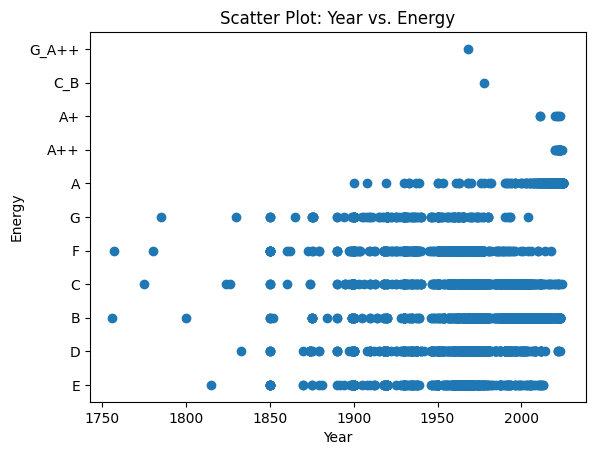

In [24]:


years = df['Construction year']
energy = df['Energy class']


plt.scatter(years, energy)

plt.xlabel('Year')
plt.ylabel('Energy')
plt.title('Scatter Plot: Year vs. Energy')


plt.show()



